<a href="https://colab.research.google.com/github/SWeat-python-weekend-study/changhyeon/blob/main/4%EC%A3%BC%EC%B0%A8/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ls

sample_data/


In [2]:
cd sample_data

/content/sample_data


In [3]:
ls

anscombe.json*                mnist_test.csv         trns_1day_series
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [5]:
import pandas as pd

df = pd.read_csv('trns_1day_series')
df.head()

,SEND,RECV,APPROVAL,REJECT
0,4779,5045,4024,755
1,5103,5055,4196,907
2,5035,5073,4653,382
3,4757,4762,4530,227
4,4639,4664,4425,214


In [9]:
df['TIME'] = pd.date_range('00:00', '23:59', freq='1min')
df = df.set_index('TIME')
df.head()

,SEND,RECV,APPROVAL,REJECT
TIME,,,,
2021-03-07 00:00:00,4779,5045,4024,755
2021-03-07 00:01:00,5103,5055,4196,907
2021-03-07 00:02:00,5035,5073,4653,382
2021-03-07 00:03:00,4757,4762,4530,227
2021-03-07 00:04:00,4639,4664,4425,214


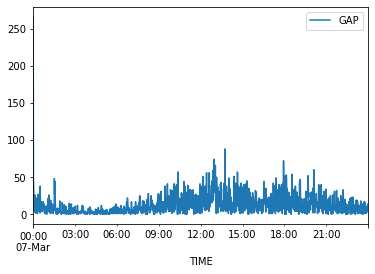

In [11]:
import numpy as np

df['GAP'] = np.abs ( df.SEND - df.RECV )
df.plot(y='GAP')

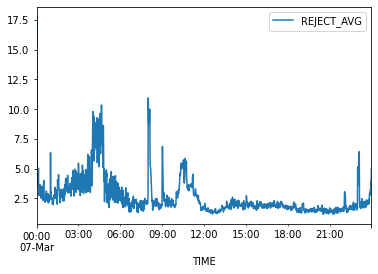

In [12]:
df['REJECT_AVG'] = df.REJECT / (df.APPROVAL + df.REJECT) * 100
df.plot(y='REJECT_AVG')

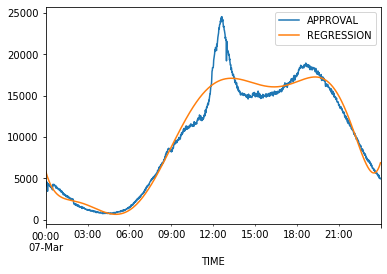

In [13]:
fp = np.polyfit( np.arange(0, len(df)), np.array(df.APPROVAL), 8) # 8차 다항식 계수 추출
fd = np.poly1d(fp) # 다항식 함수 생성
df['REGRESSION'] = fd( np.arange(0, len(df)) ) # 회귀분석 데이터
df.plot(y=['APPROVAL','REGRESSION'])

In [14]:
((df.APPROVAL - df.REGRESSION) **2).sum() / 1440
((df.APPROVAL - df.REGRESSION) **2).mean()
mse = ((df.APPROVAL - df.REGRESSION) **2).mean()
rmse = np.sqrt(mse)
rmse, mse

(1513.0345444703341, 2289273.5327605517)

In [15]:
hh_list = np.array( df.APPROVAL ).reshape(24, 60)
hh_list.shape

(24, 60)

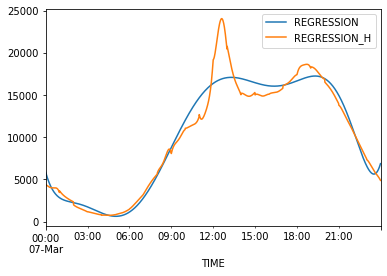

In [18]:
reg_list = []
for mm_list in hh_list: # 2차원 배열 리스트에 대한 배열 리스트 추출
  x = np.arange(0, 60) # [0,...,59] 60개짜리 X축 배열 생성
  y = mm_list # 60개짜리 실측값 Y축 배열 생성
  fp = np.polyfit(x, y, 4) # 4차 다항식 계수 연산
  fn = np.poly1d(fp) # 1차원 다항 함수 생성
  reg_list.append(fn(x)) # 다항함수에 의한 회귀분석 데이터 생성

df['REGRESSION_H'] = np.array(reg_list).flatten()
df.plot(y=['REGRESSION', 'REGRESSION_H'])

In [20]:
ls

anscombe.json*                mnist_train_small.csv  trns_msg_info
california_housing_test.csv   README.md*             trns_msg_log
california_housing_train.csv  trns_1day_series       trns_msg_resp_code_info
mnist_test.csv                trns_firm_info


In [22]:
log_df = pd.read_csv('trns_msg_log', sep=':', dtype=str)
msg_df = pd.read_csv('trns_msg_info', dtype=str)
firm_df = pd.read_csv('trns_firm_info', dtype=str)
resp_df = pd.read_csv('trns_msg_resp_code_info', dtype=str)

In [25]:
tf1 = pd.merge(log_df, msg_df, on=['MSG_CODE'], how='left') # 전문번호 정보 병합
tf2 = pd.merge(tf1 , firm_df, on=['FIRM_CODE'], how='left') # 기관코드 정보 병합
tf3 = pd.merge(tf2 , resp_df, on=['RESP_CODE'], how='left') # 응답코드
tf3.loc[tf3.TRNS == '1', 'TRNS'] = 'SEND' # tf3.TRNS=='1'인 열들을 모두 선택 후 TRNS 칼럼 값으로 'SEND'
tf3.loc[tf3.TRNS == '2', 'TRNS'] = 'RECV'

tf3.head()

,TRNS,MSG_CODE,TIME,RESP_CODE,FIRM_CODE,SEQ,MSG_NAME,FIRM_NAME,RESP_NAME
0,SEND,0100,133000,,03,2e65c202e525e90e1d95,MS승인요청,IBK기업은행,NaN
1,SEND,0300,133000,,48,802407d045fa5d1a8287,IC승인 요청,새마을금고,NaN
2,SEND,0200,133000,,03,a1d3e524e4751b450a20,현금서비스 요청,IBK기업은행,NaN
3,SEND,0200,133000,,11,ed976e8de9708d167a64,현금서비스 요청,NH농협은행,NaN
4,SEND,9300,133000,,03,b7a878a4ff5d3076dd4b,기타승인 요청,IBK기업은행,NaN


In [27]:
send_df = log_df[log_df.TRNS=='1']
recv_df = log_df[log_df.TRNS =='2']
tf = pd.merge(send_df, recv_df, on=['FIRM_CODE', 'SEQ'], how='outer')
tf = tf [['SEQ', 'FIRM_CODE', 'MSG_CODE_x', 'TIME_x', 'TIME_y','RESP_CODE_y']]
tf = tf.rename(columns={'MSG_CODE_x':'MSG_CODE', 'TIME_x':'SEND_TIME', 'TIME_y':'RECV_TIME','RESP_CODE_y':'RESP_CODE'})
tf

,SEQ,FIRM_CODE,MSG_CODE,SEND_TIME,RECV_TIME,RESP_CODE
0,2e65c202e525e90e1d95,03,0100,133000,133005,01
1,802407d045fa5d1a8287,48,0300,133000,133001,01
2,a1d3e524e4751b450a20,03,0200,133000,133000,01
3,ed976e8de9708d167a64,11,0200,133000,133008,00
4,b7a878a4ff5d3076dd4b,03,9300,133000,133003,01
...,...,...,...,...,...,...
995,226c76440f927213fc35,03,0420,133059,133100,00
996,4a0813a414e8a43ae594,23,0420,133059,133103,00
997,f9951616122039cadea7,20,0420,133059,133108,00
998,917057d635b367f53749,72,0420,133059,133107,00


In [29]:
tf['S_DATETIME'] = pd.to_datetime(tf.SEND_TIME, format='%H%M%S')
tf['R_DATETIME'] = pd.to_datetime(tf.RECV_TIME, format='%H%M%S')
tf['TIME_GAP'] = tf.R_DATETIME - tf.S_DATETIME
tf = tf.drop(['S_DATETIME','R_DATETIME'], axis=1)

tf.head()

,SEQ,FIRM_CODE,MSG_CODE,SEND_TIME,RECV_TIME,RESP_CODE,TIME_GAP
0,2e65c202e525e90e1d95,03,0100,133000,133005,01,0 days 00:00:05
1,802407d045fa5d1a8287,48,0300,133000,133001,01,0 days 00:00:01
2,a1d3e524e4751b450a20,03,0200,133000,133000,01,0 days 00:00:00
3,ed976e8de9708d167a64,11,0200,133000,133008,00,0 days 00:00:08
4,b7a878a4ff5d3076dd4b,03,9300,133000,133003,01,0 days 00:00:03


In [37]:
tf['SEC_GAP'] = tf['TIME_GAP'].dt.seconds
tf['COUNT'] = 1
tf.head()

,SEQ,FIRM_CODE,MSG_CODE,SEND_TIME,RECV_TIME,RESP_CODE,TIME_GAP,SEC_GAP,COUNT
0,2e65c202e525e90e1d95,03,0100,133000,133005,01,0 days 00:00:05,5,1
1,802407d045fa5d1a8287,48,0300,133000,133001,01,0 days 00:00:01,1,1
2,a1d3e524e4751b450a20,03,0200,133000,133000,01,0 days 00:00:00,0,1
3,ed976e8de9708d167a64,11,0200,133000,133008,00,0 days 00:00:08,8,1
4,b7a878a4ff5d3076dd4b,03,9300,133000,133003,01,0 days 00:00:03,3,1


In [39]:
# 처리시간별 현황
tf.groupby('SEC_GAP').sum() # 처리시간 그룹 후 해당 그룹별 합계 (숫자로 지정된 항목인 COUNT만 수행)

,COUNT
SEC_GAP,
0,91
1,96
2,112
3,96
4,99
5,106
6,99
7,94
8,104


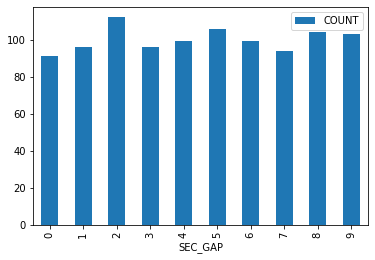

In [44]:
df = tf.groupby('SEC_GAP').sum() # 처리시간 그룹 후 해당 그룹별 합계 (숫자로 지정된 항목인 COUNT만 수행)
df.plot(kind='bar')

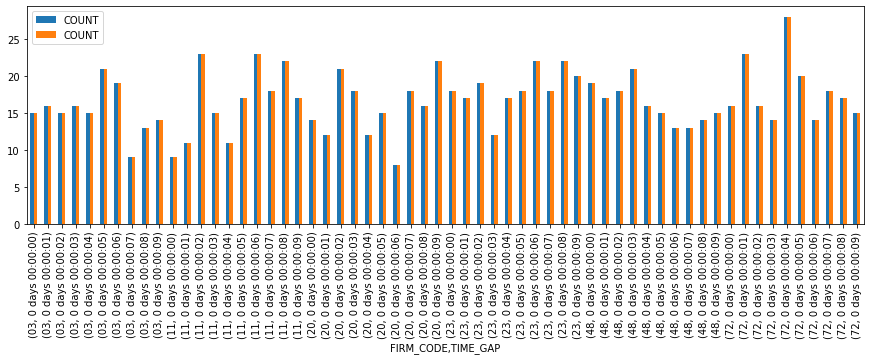

In [45]:
tf.groupby(['FIRM_CODE','TIME_GAP']).count()
tf.groupby(['FIRM_CODE','TIME_GAP']).count().rename(columns={'SEQ':'COUNT'})
tf.groupby(['FIRM_CODE','TIME_GAP']).count().rename(columns={'SEQ':'COUNT'}) [['COUNT']]
df = tf.groupby(['FIRM_CODE', 'TIME_GAP']).count().rename(columns={'SEQ':'COUNT'}) [['COUNT']]
df.plot(kind='bar', figsize=(15,4)) #bar 차트, 차트의 크기는 (15, 4)

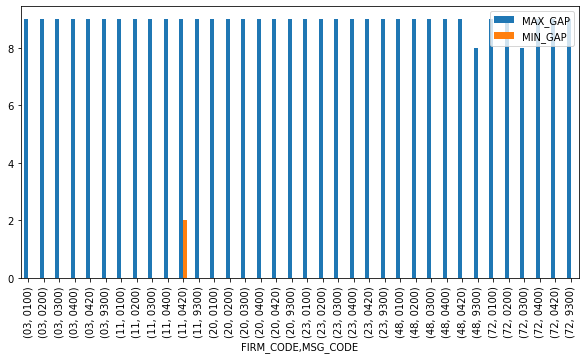

In [46]:
zf = tf[['FIRM_CODE','MSG_CODE','TIME_GAP']] # 3개 칼럼만 선택한 DataFrame 생성
max_df = zf.groupby(['FIRM_CODE','MSG_CODE']).max().rename(columns={'TIME_GAP':'MAX_GAP'})
min_df = zf.groupby(['FIRM_CODE','MSG_CODE']).min().rename(columns={'TIME_GAP':'MIN_GAP'})
max_df = max_df.reset_index() #그룹연산으로 지정된 index를 reset (merge를 위하여)
min_df = min_df.reset_index() #그룹연산으로 지정된 index를 reset
df = pd.merge(max_df, min_df)
df['MAX_GAP'] = df.MAX_GAP.dt.seconds # timedelta 객체를 seconds로 변환 (정수형 값)
df['MIN_GAP'] = df.MIN_GAP.dt.seconds # timedelta 객체를 seconds로 변환 (정수형 값)
df.set_index(['FIRM_CODE','MSG_CODE']).plot(kind='bar', figsize=(10,5))